In [ ]:
!pip install mglearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. 데이터 불러오기 및 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/adult.csv')
df.head(3)

age  workclass  fnlwgt   education  educational-num      marital-status  \
0   25    Private  226802        11th                7       Never-married   
1   38    Private   89814     HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm               12  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   
2    Protective-serv      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K

In [ ]:
df.shape

(48842, 16)

In [ ]:
df.replace('?', np.NaN, inplace = True)

In [ ]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
gain                  0
dtype: int64

In [ ]:
for NaNcolumn in ['workclass', 'occupation', 'native-country']:
    df[NaNcolumn].fillna(df[NaNcolumn].mode()[0], inplace = True)

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
gain               0
dtype: int64

2. 데이터 EDA 분석

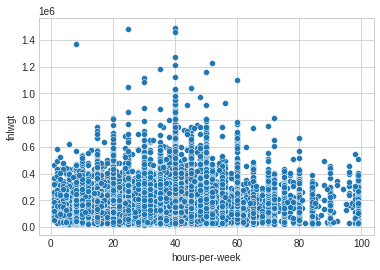

In [ ]:
sns.scatterplot(x = df['hours-per-week'], y = df['fnlwgt']) 

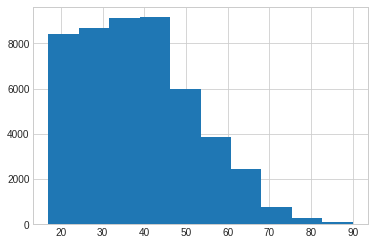

In [ ]:
df['age'].hist()

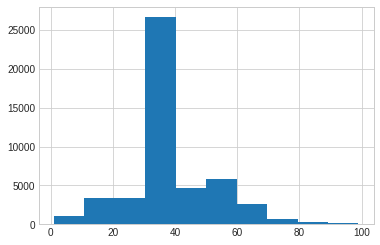

In [ ]:
df['hours-per-week'].hist()

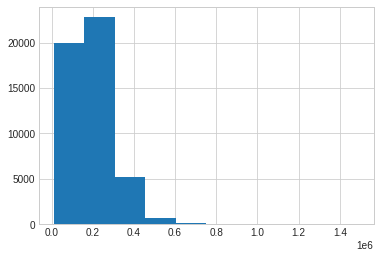

In [ ]:
df['fnlwgt'].hist()

In [ ]:
df[['income', 'age']].groupby(['income'], as_index = False).mean()

income        age
0  <=50K  36.872184
1   >50K  44.275178

In [ ]:
np.corrcoef(df['educational-num'], df['fnlwgt'])

array([[ 1.        , -0.03876068],
       [-0.03876068,  1.        ]])

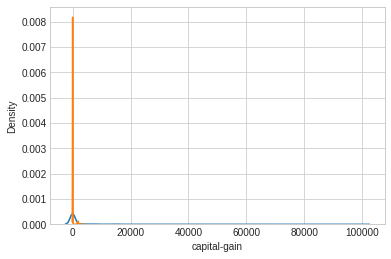

In [ ]:
sns.kdeplot(x = df['capital-gain'])
sns.kdeplot(x = df['capital-loss'])

In [ ]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

In [ ]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

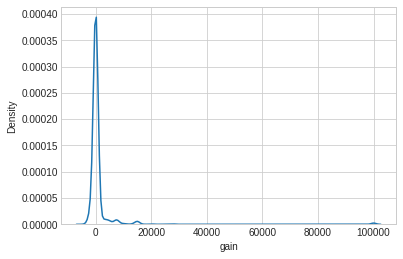

In [ ]:
df['gain'] = df['capital-gain'] - df['capital-loss']
sns.kdeplot(x = df['gain'])

In [ ]:
np.corrcoef(df['hours-per-week'], df['gain'])

array([[1.        , 0.07896236],
       [0.07896236, 1.        ]])

In [ ]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

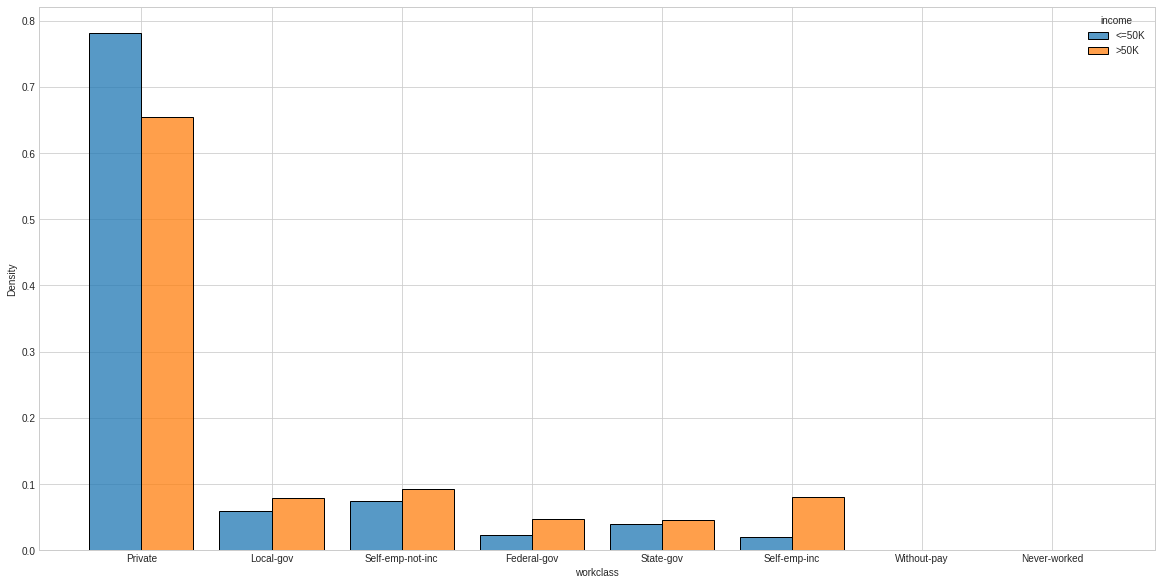

In [ ]:
plt.figure(figsize = (20, 10))
sns.histplot(x = df['workclass'], hue = df['income'], multiple = 'dodge', stat = 'density', shrink = 0.8, common_norm = False)

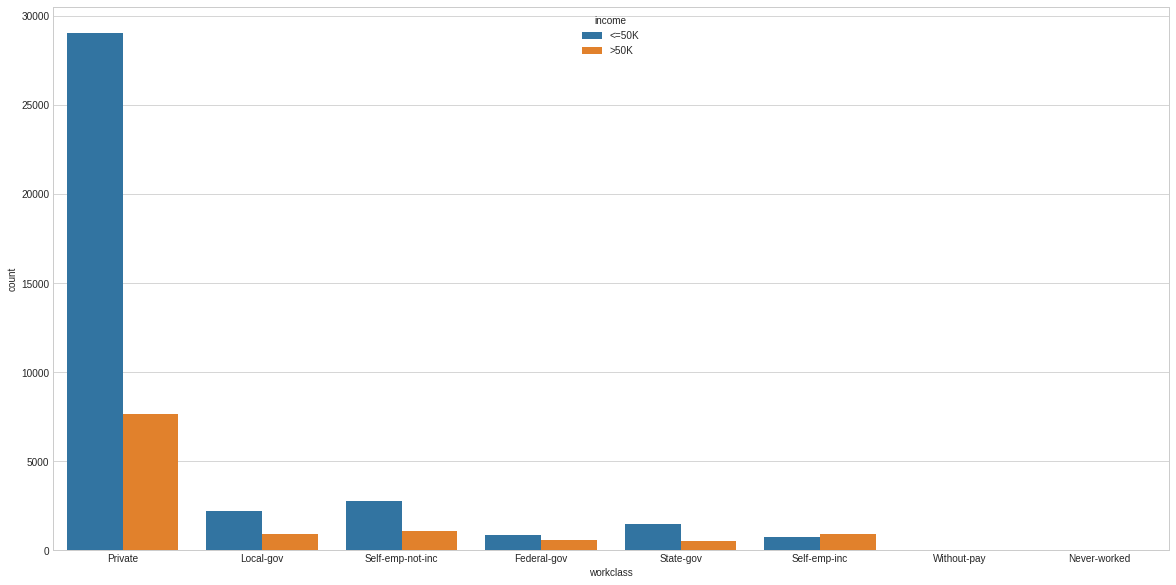

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'workclass', hue = 'income', data = df)

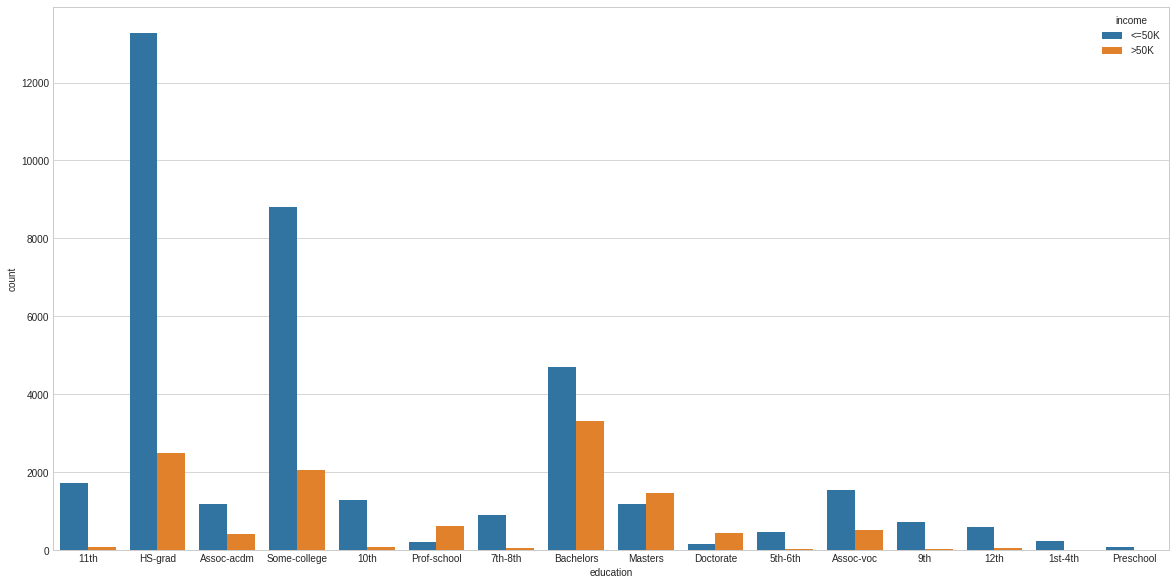

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'education', hue = 'income', data = df)

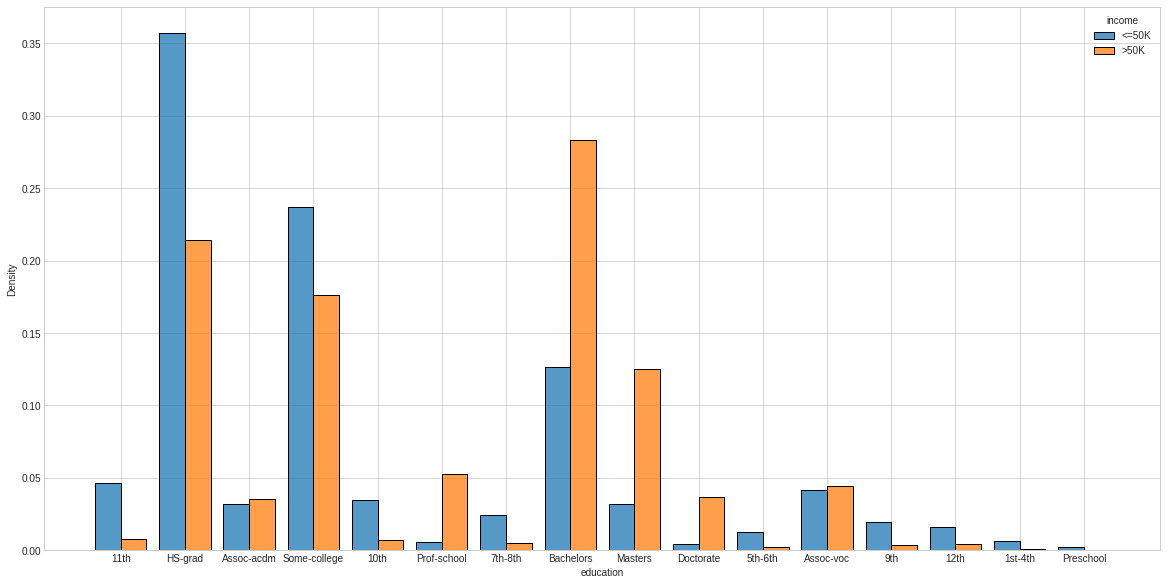

In [ ]:
plt.figure(figsize = (20, 10))
sns.histplot(x = df['education'], hue = df['income'], multiple = 'dodge', stat = 'density', shrink = 0.8, common_norm = False)

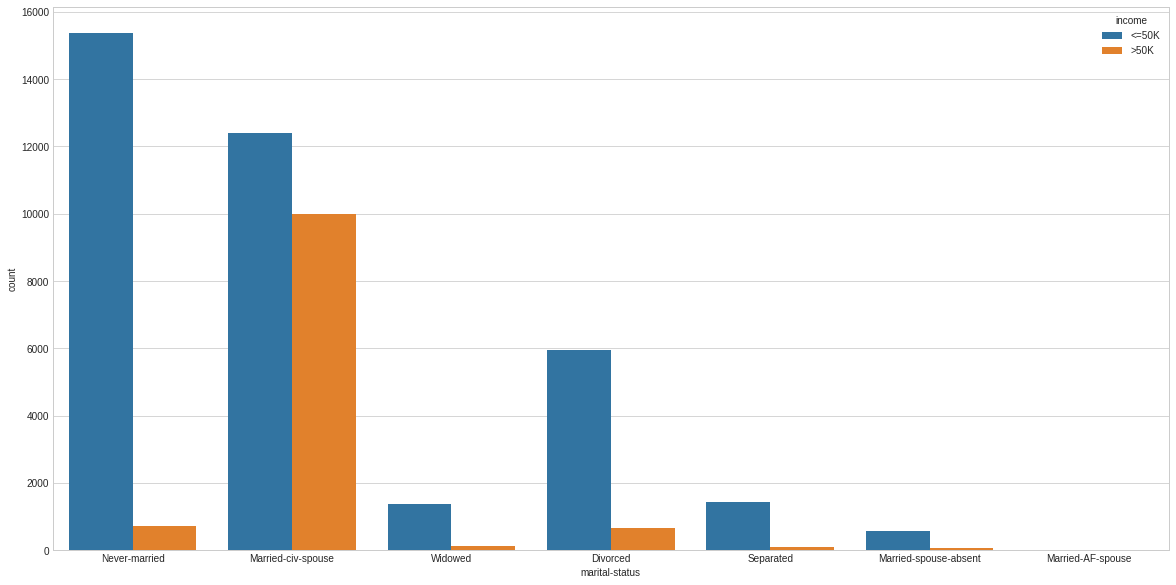

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'marital-status', hue = 'income', data = df)

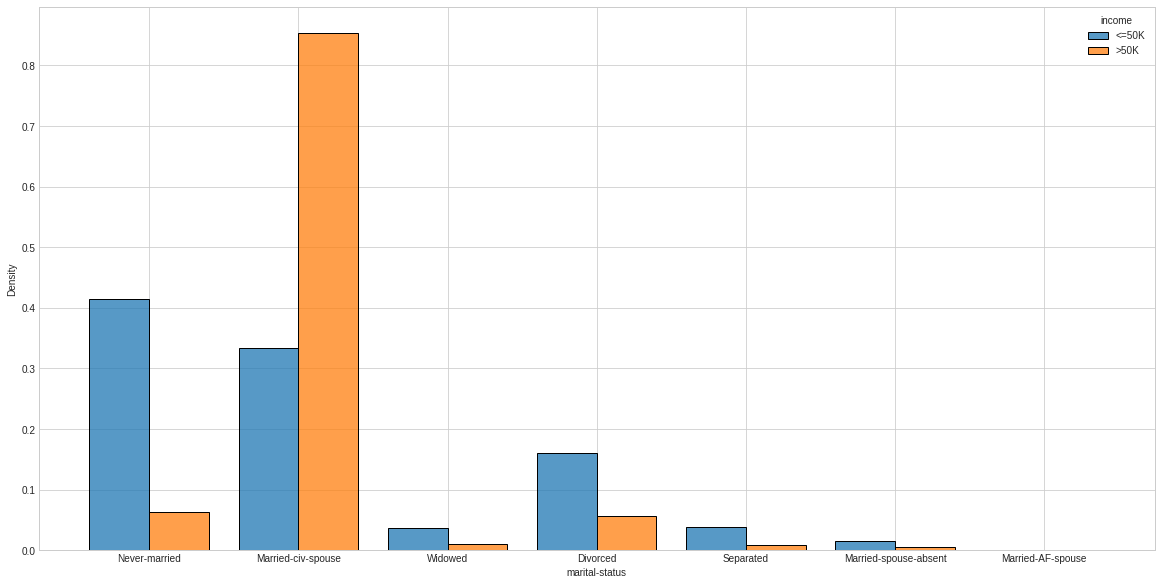

In [ ]:
plt.figure(figsize = (20, 10))
sns.histplot(x = df['marital-status'], hue = df['income'], multiple = 'dodge', stat = 'density', shrink = 0.8, common_norm = False)

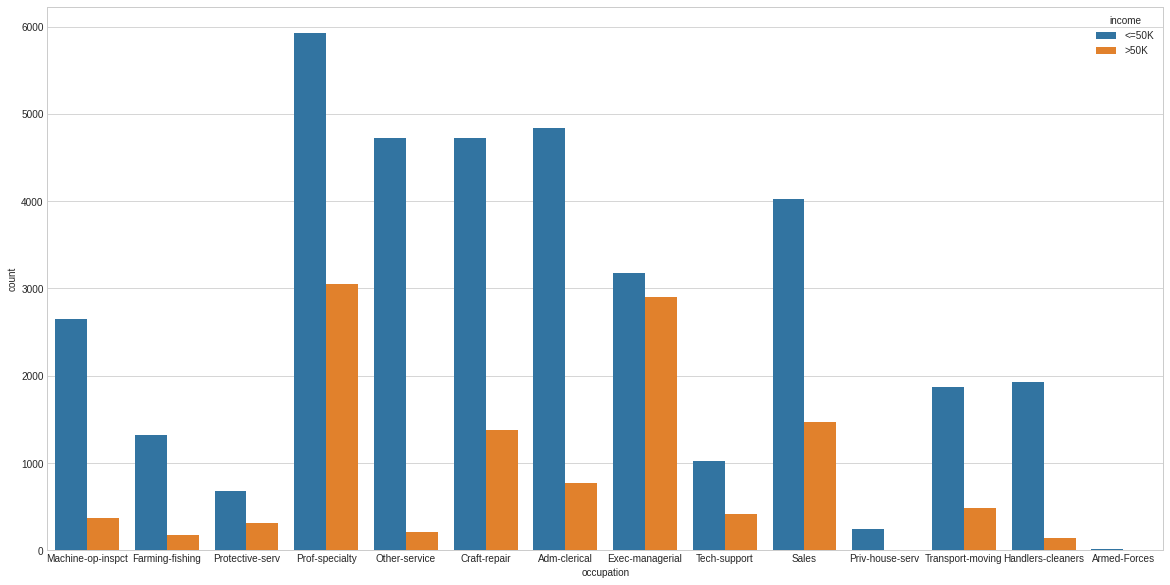

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'occupation', hue = 'income', data = df)

In [ ]:
df['occupation'].value_counts()

Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

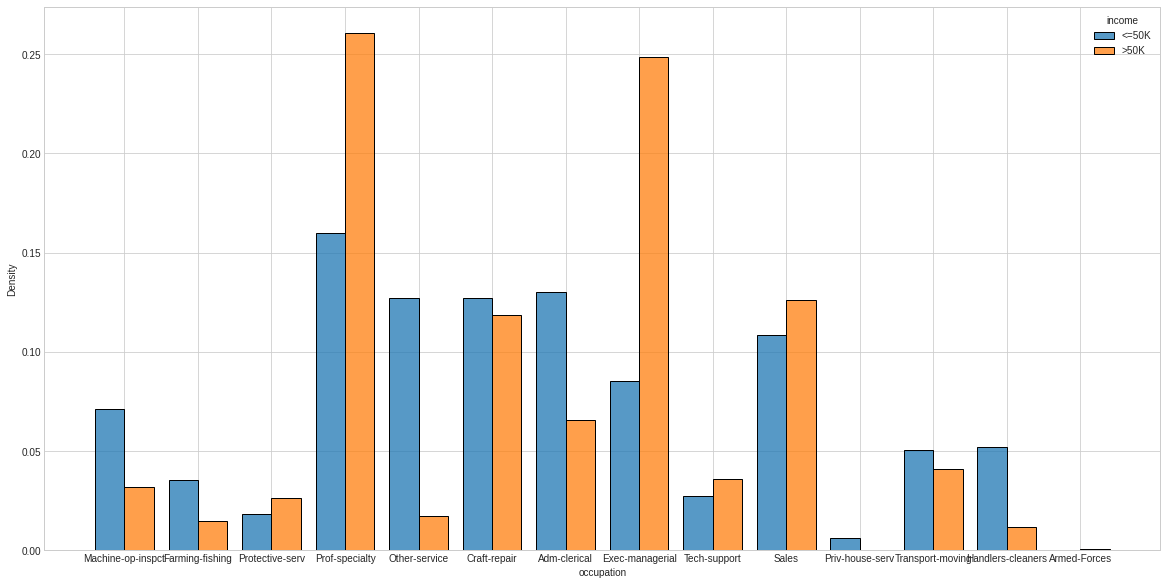

In [ ]:
plt.figure(figsize = (20, 10))
sns.histplot(x = df['occupation'], hue = df['income'], multiple = 'dodge', stat = 'density', shrink = 0.8, common_norm = False)


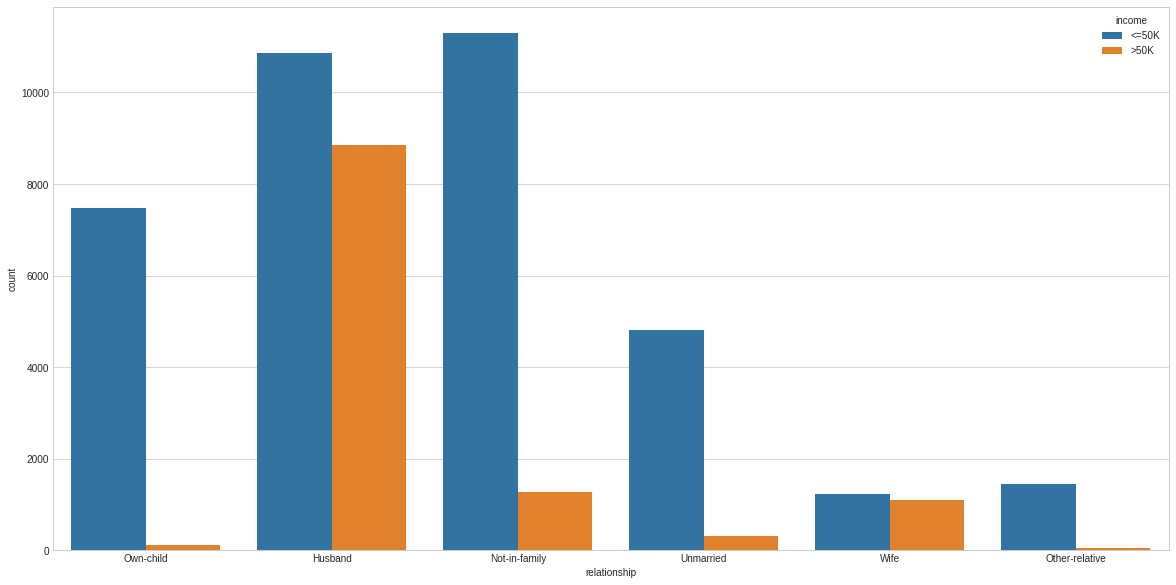

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'relationship', hue = 'income', data = df)

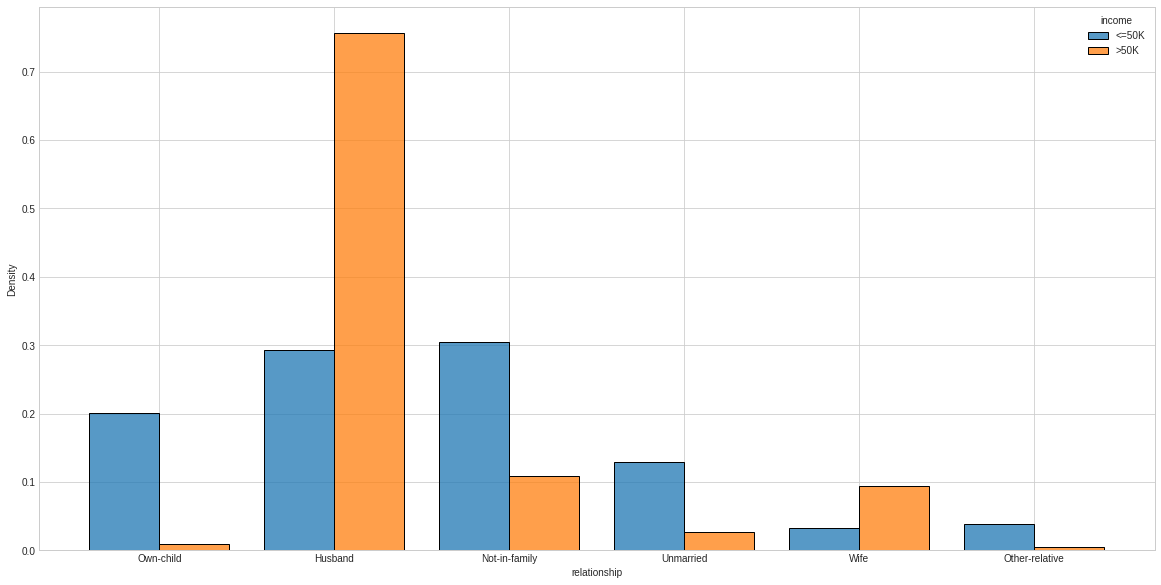

In [ ]:
plt.figure(figsize = (20, 10))
sns.histplot(x = df['relationship'], hue = df['income'], multiple = 'dodge', stat = 'density', shrink = 0.8, common_norm = False)

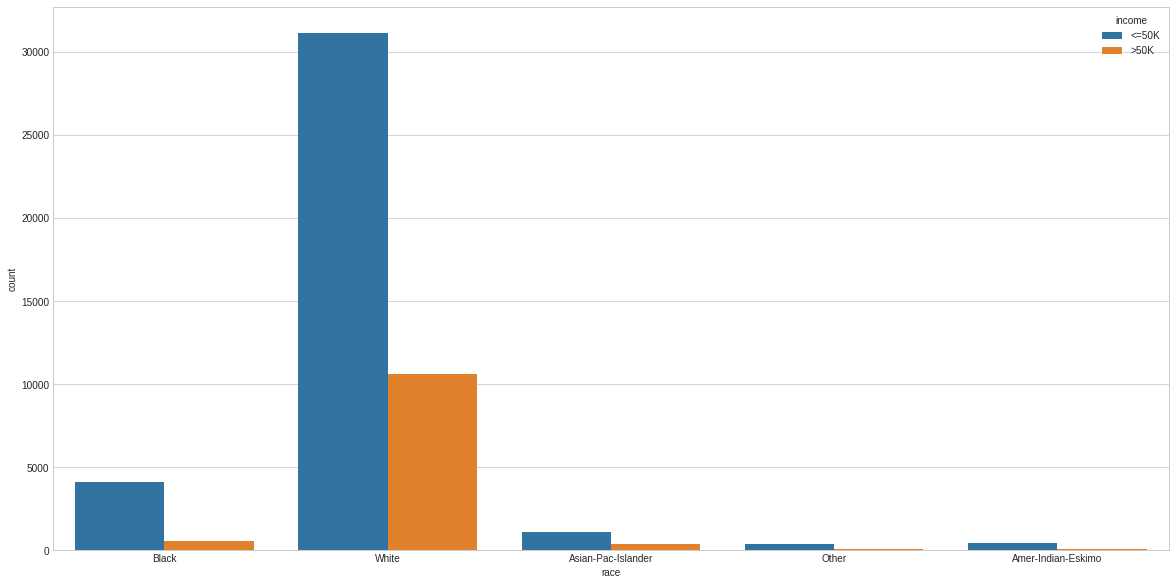

In [ ]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'race', hue = 'income', data = df)

In [ ]:
df['native-country'].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

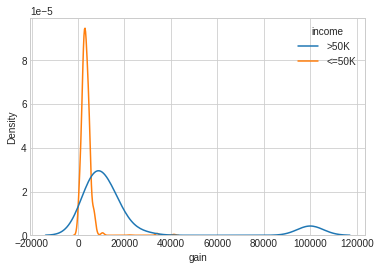

In [ ]:
rich = df[df['gain'] > 0]
sns.kdeplot(x = 'gain', hue = 'income', data = rich)

In [ ]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18    Private  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4     Prof-specialty    Own-child  White  Female             0             0   

   hours-per-week native-country income  gain  
0              40  United-States  <=50K     0  
1              50  United-States  <=50K     0  
2              40  United-States   >50K     0  
3              40  United-States   >50K  7688  
4              30  United-States  <=50K     0

In [ ]:
df[['education', 'educational-num']].head(20)

education  educational-num
0           11th                7
1        HS-grad                9
2     Assoc-acdm               12
3   Some-college               10
4   Some-college               10
5           10th                6
6        HS-grad                9
7    Prof-school               15
8   Some-college               10
9        7th-8th                4
10       HS-grad                9
11     Bachelors               13
12       HS-grad                9
13       HS-grad                9
14       HS-grad                9
15       Masters               14
16  Some-college               10
17       HS-grad                9
18       HS-grad                9
19     Doctorate               16

범주형 변수 인코딩

In [ ]:
def native_country_map(X):
  if X == 'United-States':
    return 1
  else:
    return 0
education_map = {'1st-4th' : 'Child', '5th-6th' : 'Child', '7th-8th' : 'Child', '9th' : 'Child', '10th' : 'Child', '11th' : 'Child', '12th' : 'Child', 'Preschool' : 'Child',
                 'Assoc-acdm' : 'College', 'Assoc-voc' : 'College', 'Some-college' : 'College',
                 'Prof-school' : 'Master', 'Masters' : 'Master', 'Doctorate' : 'Doctor',
                 'Bachelors' : 'Bachelors', 'HS-grad' : 'High School'}
income_to_label = {'<=50K' : 0, '>50K' : 1}
married_map = {'Never-married' : 'No', 'Married-AF-spouse' : 'Married', 'Married-civ-spouse' : 'Married', 'Married-spouse-absent' : 'Married',
               'Separated' : 'Divorced', 'Divorced' : 'Divorced', 'Widowed' : 'Widowed'}
sex_map = {'Male' : 0, 'Female' : 1}
relation_map = {'Husband' : 5, 'Wife' : 4, 'Not-in-family' : 3, 'Unmarried' : 2, 'Own-child' : 1, 'Other-relative' : 0}
race_map = {'White' : 3, 'Black' : 2, 'Asian-Pac-Islander' : 4, 'Other' : 1, 'Amer-Indian-Eskimo' : 0}
occupation_map = {'Prof-specialty' : 11, 'Exec-managerial' : 12, 'Sales' : 13, 'Craft-repair' : 10, 'Adm-clerical' : 9, 'Tech-support' : 8, 'Machine-op-inspct' : 7,
                  'Farming-fishing' : 5, 'Protective-serv' : 6, 'Transport-moving' : 4, 'Handlers-cleaners' : 3, 'Armed-Forces' : 0, 'Priv-house-serv' : 1, 'Other-service' : 2}
marital_map = {'Married' : 3,'Divorced' : 2, 'No' : 1, 'Widowed' : 0}
edu_map = {'Bachelors' : 5, 'Master' : 4, 'Doctor' : 3, 'College' : 2, 'High School' : 1, 'Child' : 0}
workclass_map = {'Self-emp-inc' : 7, 'Federal-gov' : 6, 'Self-emp-not-inc' : 5, 'State-gov' : 4, 'Local-gov' : 3, 'Private' : 2, 'Never-worked' : 1, 'Without-pay' : 0}


df['education'] = df['education'].map(education_map)
df['income'] = df['income'].map(income_to_label)
df['marital-status'] = df['marital-status'].map(married_map)
df['gender'] = df['gender'].map(sex_map)
df['relationship'] = df['relationship'].map(relation_map)
df['race'] = df['race'].map(race_map)
df['occupation'] = df['occupation'].map(occupation_map)
df['marital-status'] = df['marital-status'].map(marital_map)
df['education'] = df['education'].map(edu_map)
df['native-country'] = df['native-country'].apply(lambda x : native_country_map(x))
df['workclass'] = df['workclass'].map(workclass_map)

(20.0, 60.0)

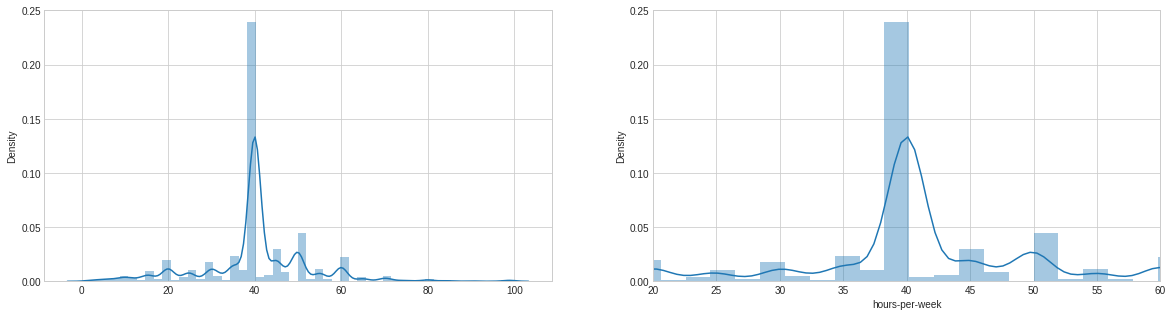

In [ ]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.distplot(x=df["hours-per-week"]);
plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"}, color = 'b')
sns.distplot(df[df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"}, color = 'r')
plt.ylim(0, None)
plt.xlim(20, 60)

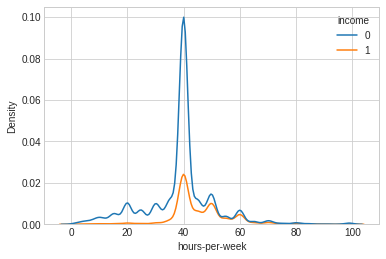

In [ ]:
sns.kdeplot(x = df['hours-per-week'], hue = df['income'])

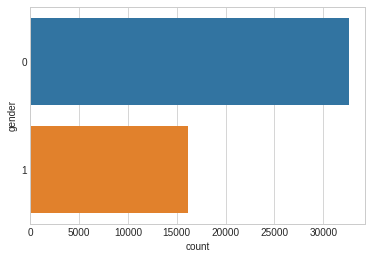

In [ ]:
sns.countplot(y = "gender", data = df)

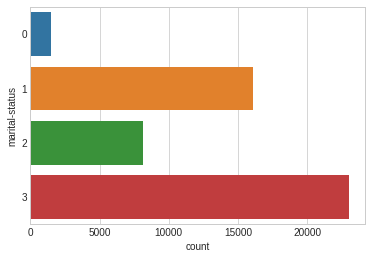

In [ ]:

sns.countplot(y = "marital-status", data = df)

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
gain               0
dtype: int64

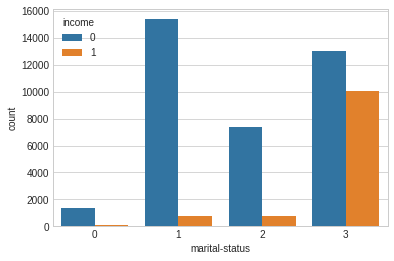

In [ ]:
sns.countplot(x = 'marital-status', hue = 'income', data = df)

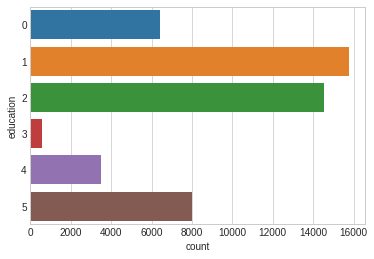

In [ ]:
sns.countplot(y = "education" , data = df)

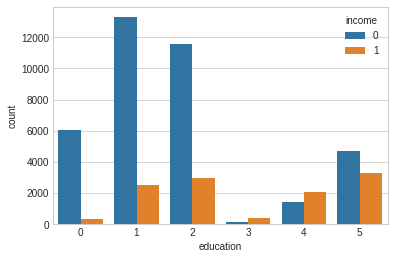

In [ ]:
sns.countplot(x = 'education', hue = 'income', data = df)

In [ ]:
df.drop(['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss'], axis = 1 ,inplace= True)

In [ ]:
df.head(10)

age  workclass  education  marital-status  occupation  relationship  race  \
0   25          2          0               1           7             1     2   
1   38          2          1               3           5             5     3   
2   28          3          2               3           6             5     3   
3   44          2          2               3           7             5     2   
4   18          2          2               1          11             1     3   
5   34          2          0               1           2             3     3   
6   29          2          1               1          11             2     2   
7   63          5          4               3          11             5     3   
8   24          2          2               1           2             2     3   
9   55          2          0               3          10             5     3   

   gender  hours-per-week  native-country  income  gain  
0       0              40               1       0     0  
1       0              50               1       0     0  
2       0              40               1       1     0  
3       0              40               1       1  7688  
4       1              30               1       0     0  
5       0              30               1       0     0  
6       0              40               1       0     0  
7       0              32               1       1  3103  
8       1              40               1       0     0  
9       0              10               1       0     0

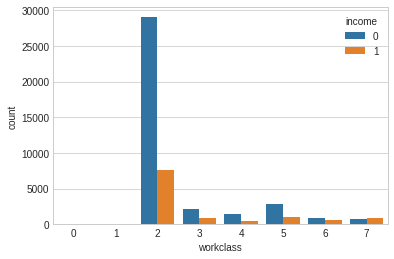

In [ ]:
sns.countplot(x = 'workclass', hue = 'income', data = df)

In [ ]:
def native_country_map(X):
  if X == 'United-States':
    return 1
  else:
    return 0

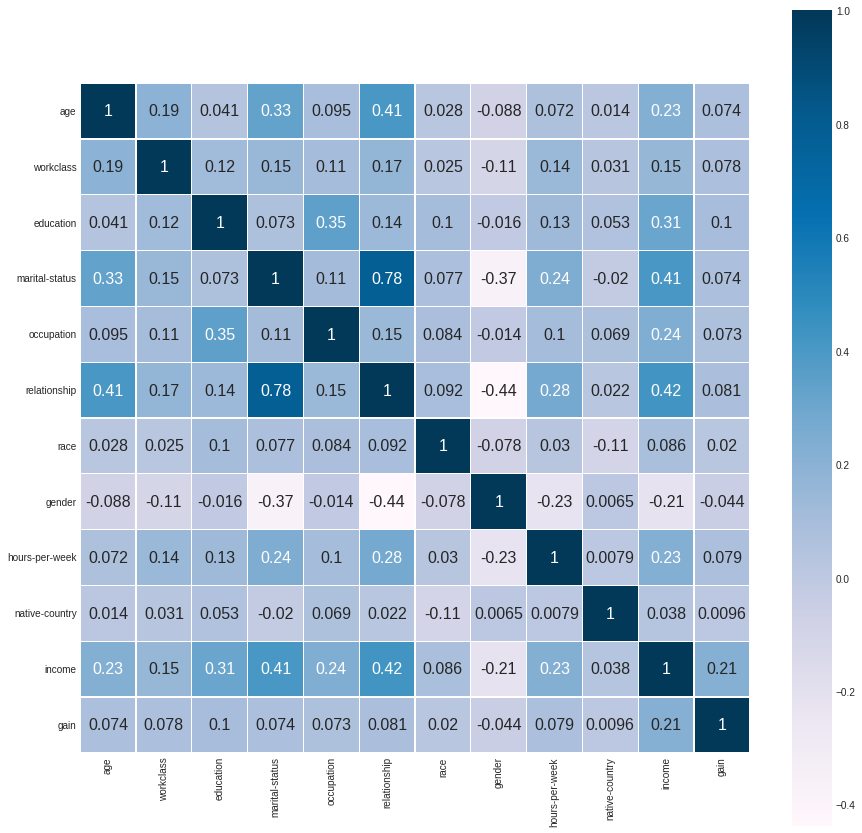

In [ ]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(15, 15))

sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'hours-per-week', 'native-country',
       'income', 'gain'],
      dtype='object')

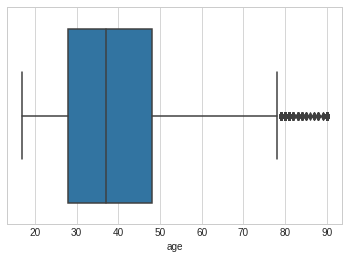

In [ ]:
sns.boxplot(x = df['age'])

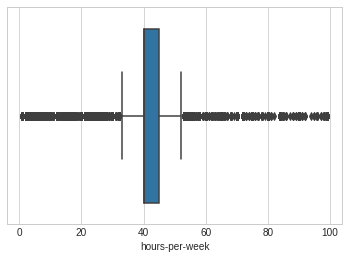

In [ ]:
sns.boxplot(x = df['hours-per-week'])

In [ ]:
'''from sklearn.preprocessing import RobustScaler

X_features = df.drop('income', axis = 1)
target = df['income']
scaler = RobustScaler()
scaler.fit(X_features)
scaled_data = scaler.transform(X_features)

df_scaled = pd.DataFrame(scaled_data, columns = X_features.columns)
df_scaled.head()'''

age  workclass  education  marital-status  occupation  relationship  race  \
0 -0.60        0.0       -2.0            -0.5       -0.75     -0.666667  -1.0   
1  0.05        0.0       -1.0             0.5       -1.25      0.666667   0.0   
2 -0.45        1.0        0.0             0.5       -1.00      0.666667   0.0   
3  0.35        0.0        0.0             0.5       -0.75      0.666667  -1.0   
4 -0.95        0.0        0.0            -0.5        0.25     -0.666667   0.0   

   gender  hours-per-week  native-country    gain  
0     0.0             0.0             0.0     0.0  
1     0.0             2.0             0.0     0.0  
2     0.0             0.0             0.0     0.0  
3     0.0             0.0             0.0  7688.0  
4     1.0            -2.0             0.0     0.0

데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_features = df.drop('income', axis = 1)
target = df['income']
scaler = MinMaxScaler()
scaler.fit(X_features)
scaled_data = scaler.transform(X_features)

df_scaled = pd.DataFrame(scaled_data, columns = X_features.columns)
df_scaled.head()

age  workclass  education  marital-status  occupation  relationship  \
0  0.109589   0.285714        0.0        0.333333    0.538462           0.2   
1  0.287671   0.285714        0.2        1.000000    0.384615           1.0   
2  0.150685   0.428571        0.4        1.000000    0.461538           1.0   
3  0.369863   0.285714        0.4        1.000000    0.538462           1.0   
4  0.013699   0.285714        0.4        0.333333    0.846154           0.2   

   race  gender  hours-per-week  native-country      gain  
0  0.50     0.0        0.397959             1.0  0.041742  
1  0.75     0.0        0.500000             1.0  0.041742  
2  0.75     0.0        0.397959             1.0  0.041742  
3  0.50     0.0        0.397959             1.0  0.115414  
4  0.75     1.0        0.295918             1.0  0.041742

In [ ]:
X_features.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
gain              0
dtype: int64

차원축소 - 군집화 결과 가시화 위해

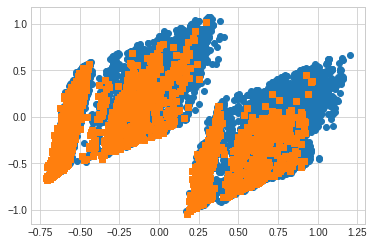

In [ ]:
#실제 결과 가시화
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_scaled)

clusterDF = pd.DataFrame(pca_transformed, columns = ['pca_x', 'pca_y'])
clusterDF['target'] = target

target0_ind = df[df['income'] == 0].index
target1_ind = df[df['income'] == 1].index

df['pca_x'] = pca_transformed[:, 0]
df['pca_y'] = pca_transformed[:, 1]

plt.scatter(x = df.loc[target0_ind, 'pca_x'], y = df.loc[target0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = df.loc[target1_ind, 'pca_x'], y = df.loc[target1_ind, 'pca_y'], marker = 's')

In [ ]:
pca.explained_variance_ratio_

array([0.37532194, 0.17351033])

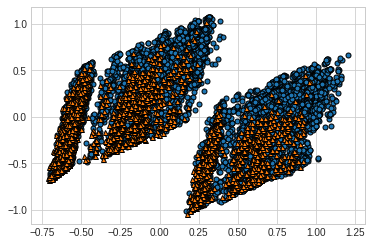

In [ ]:
mglearn.discrete_scatter(clusterDF['pca_x'], clusterDF['pca_y'], clusterDF['target'], s = 5)

Text(0.5, 1.0, 'cluster after PCA')

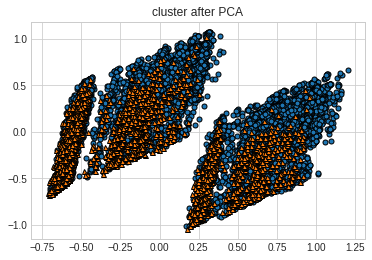

In [ ]:
def Simple_Scatter(Data, i, Name):
  G = sns.jointplot(x = 'pca_x', y = 'pca_y', data = Data, kind = 'scatter', hue = "target")
  G.fig.suptitle("Data : " + Name, fontsize = 10, color = 'black', alpha = 0.9)

mglearn.discrete_scatter(clusterDF['pca_x'], clusterDF['pca_y'], clusterDF['target'], s = 5)
plt.title('cluster after PCA')

In [ ]:
#K-Means 군집화 결과 가시화
def k_Means_Plot(Data, Select_k, Init_Method = 'k-means++', Num_init = 10):
  Data2 = Data[['pca_x', 'pca_y']]
  fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(22, 4))
  for i in Select_k:
    Kmeans_Clustering = KMeans(n_clusters = i, init = Init_Method, random_state = 2022, n_init = Num_init)
    Kmeans_Clustering.fit(Data2)
    mglearn.discrete_scatter(Data2['pca_x'], Data2['pca_y'], Kmeans_Clustering.labels_, ax = axes[i-2], s=5)
    mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0],
                             Kmeans_Clustering.cluster_centers_[:, 1],
                             list(range(i)),
                             markeredgewidth = 3,
                             ax = axes[i-2], s= 10)
    v_measure_score = np.round(metrics.v_measure_score(Data['target'], Kmeans_Clustering.labels_), 3)    
    Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_), 3)
    axes[i-2].set_title('Diabetic data ' + ' / k = ' + str(i) + ' / S_Score : ' + str(Score) + 'V-measure : ' + str(v_measure_score))

In [ ]:
def visualize_cluster_plot(clusterobj, Data, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(Data[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = Data[Data[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        v_measure_score = np.round(metrics.v_measure_score(Data['target'], Data['dbscan_cluster']), 3)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

      

In [ ]:
def Scatter_plot(Data):
  G = sns.jointplot(x = 'pca_x', y = 'pca_y', data = Data, kind = 'scatter', hue = "target")
  G.fig.suptitle("Data : " , fontsize = 10, color = 'black', alpha = 0.9)

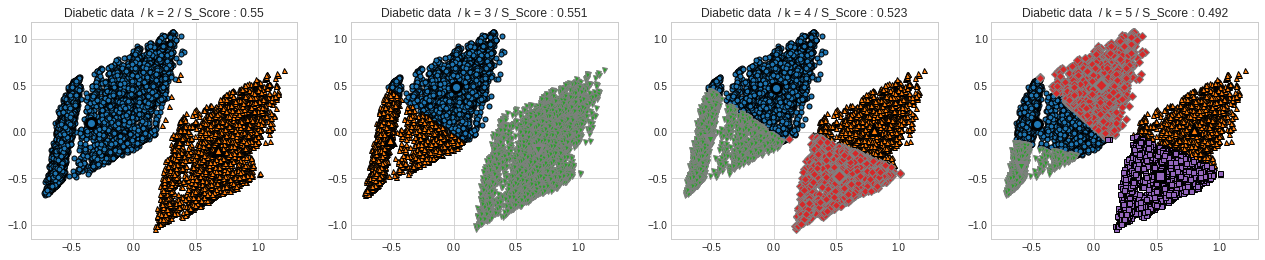

In [ ]:
import sklearn.metrics as metrics

k_Means_Plot(Data = clusterDF,
              Select_k = range(2,6),
              Init_Method = 'random', Num_init = 10)

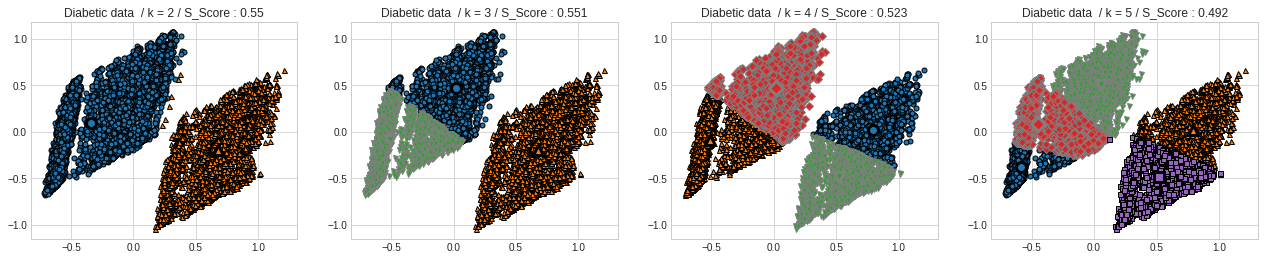

In [ ]:
k_Means_Plot(Data = clusterDF,
              Select_k = range(2,6),
              Init_Method = 'k-means++', Num_init = 10)

군집화 결과와 실제 결과 비교

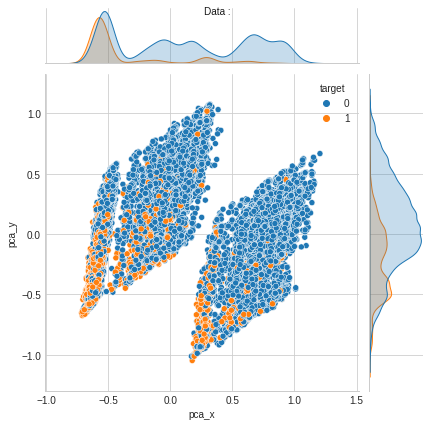

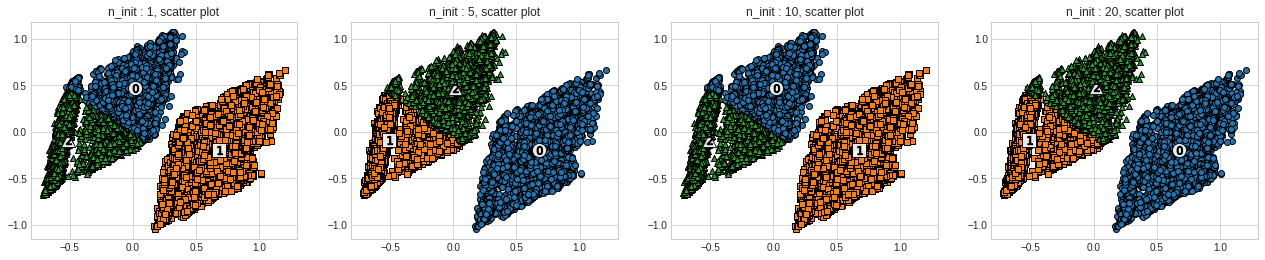

In [ ]:
#군집화 결과와 실제 결과 비교
n_init = [1, 5, 10, 20]
Scatter_plot(clusterDF)
plt.show()

fig, ax = plt.subplots(1, 4, figsize = (22, 4))

for i in range(4):
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = n_init[i], random_state = 2022)
    cluster_labels = kmeans.fit_predict(pca_transformed)
    clusterDF = pd.DataFrame(data = pca_transformed, columns = ['pca_x', 'pca_y'])
    clusterDF['kmeans_label'] = cluster_labels
    clusterDF['target'] = target

    centers = kmeans.cluster_centers_
    unique_labels = np.unique(cluster_labels)

    markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = centers[label]
        ax[i].scatter(x = label_cluster['pca_x'], y = label_cluster['pca_y'], edgecolor = 'k', marker = markers[label])

        ax[i].scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
        ax[i].scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
        ax[i].set_title('n_init : ' + str(n_init[i]) + ', scatter plot')
    v_measure_score = np.round(metrics.v_measure_score(clusterDF['target'], cluster_labels), 3)    
plt.show()

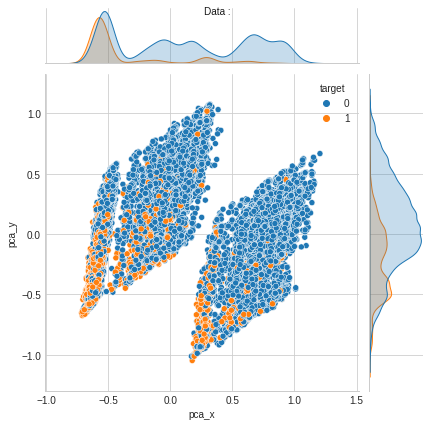

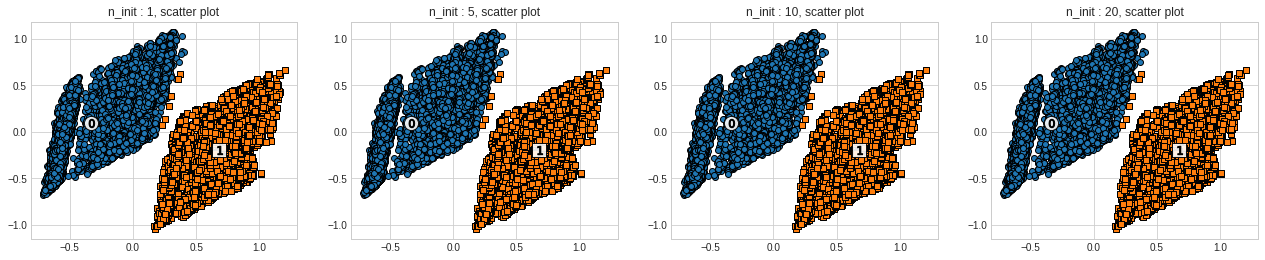

In [ ]:
n_init = [1, 5, 10, 20]
Scatter_plot(clusterDF)
plt.show()

fig, ax = plt.subplots(1, 4, figsize = (22, 4))

for i in range(4):
    kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = n_init[i], random_state = 2022)
    cluster_labels = kmeans.fit_predict(pca_transformed)
    clusterDF = pd.DataFrame(data = pca_transformed, columns = ['pca_x', 'pca_y'])
    clusterDF['kmeans_label'] = cluster_labels
    clusterDF['target'] = target

    centers = kmeans.cluster_centers_
    unique_labels = np.unique(cluster_labels)

    markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = centers[label]
        ax[i].scatter(x = label_cluster['pca_x'], y = label_cluster['pca_y'], edgecolor = 'k', marker = markers[label])

        ax[i].scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
        ax[i].scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
        ax[i].set_title('n_init : ' + str(n_init[i]) + ', scatter plot')
    v_measure_score = np.round(metrics.v_measure_score(clusterDF['target'], cluster_labels), 3)    
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 5, random_state = 2022)
cluster_labels = kmeans.fit_predict(pca_transformed)
clusterDF = pd.DataFrame(data = pca_transformed, columns = ['pca_x', 'pca_y'])
clusterDF['kmeans_label'] = cluster_labels
clusterDF['target'] = target

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    ax[i].scatter(x = label_cluster['pca_x'], y = label_cluster['pca_y'], edgecolor = 'k', marker = markers[label])

    ax[i].scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    ax[i].scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
    ax[i].set_title('n_init : ' + str(n_init[i]) + ', scatter plot')
v_measure_score = np.round(metrics.v_measure_score(clusterDF['target'], cluster_labels), 3)    

실제 결과 vs 군집화 결과 비교하여 정답율 비교

In [ ]:
clusterDF['target'] = target
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               22726
        1               14429
1       0                9918
        1                1769
Name: kmeans_label, dtype: int64


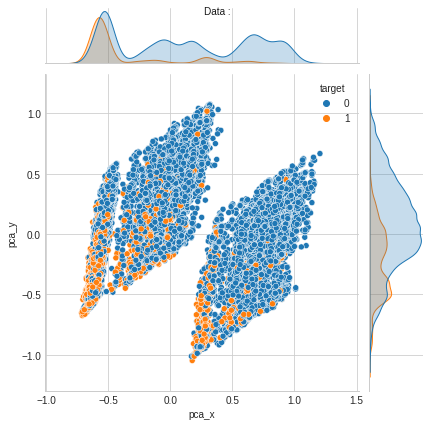

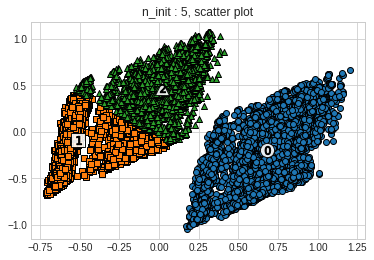

In [ ]:
Scatter_plot(clusterDF)
plt.show()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 5, random_state = 2022)
cluster_labels = kmeans.fit_predict(pca_transformed)
clusterDF = pd.DataFrame(data = pca_transformed, columns = ['pca_x', 'pca_y'])
clusterDF['kmeans_label'] = cluster_labels
clusterDF['target'] = target

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['pca_x'], y = label_cluster['pca_y'], edgecolor = 'k', marker = markers[label])

    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
    plt.title('n_init : ' + str(5) + ', scatter plot')
plt.show()

Elbow Point로 적절한 클러스터 수 정하기

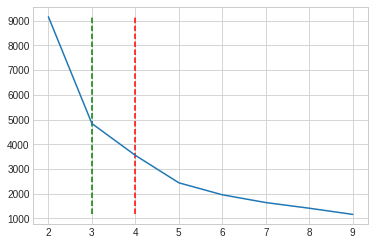

In [ ]:
inertia_arr = []
k_range = range(2, 10)

for k in k_range:
    Kmeans = KMeans(n_clusters = k, n_init = 5, random_state = 2022)
    Kmeans.fit(clusterDF[['pca_x', 'pca_y']])
    inertia = Kmeans.inertia_

    inertia_arr.append(inertia)

plt.plot(k_range, inertia_arr)
plt.vlines(3, ymin = min(inertia_arr) * 0.9999, ymax = max(inertia_arr) * 1.0003, linestyles = '--', colors = 'g')
plt.vlines(4, ymin = min(inertia_arr) * 0.9999, ymax = max(inertia_arr) * 1.0003, linestyles = '--', colors = 'r')

Cluster 개수가 3인 경우 실제 레이블과 군집화 결과 비교

In [ ]:
clusterDF['target'] = target
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               14423
        1               12376
        2               10356
1       1                9479
        0                1769
        2                 439
Name: kmeans_label, dtype: int64


실루엣 스코어 가시화 하기

In [ ]:
## 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

        

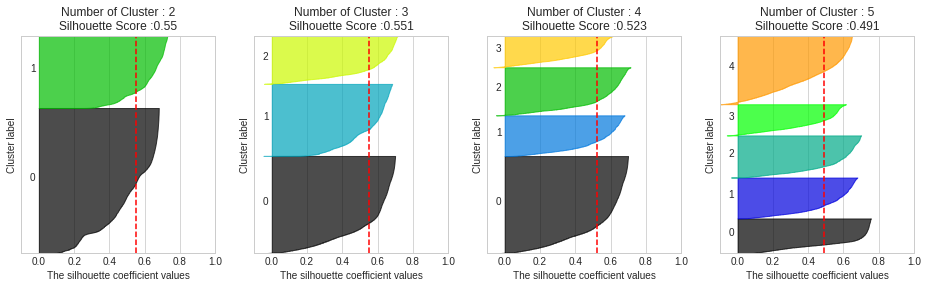

In [ ]:
visualize_silhouette([ 2, 3, 4, 5], clusterDF[['pca_x', 'pca_y']])

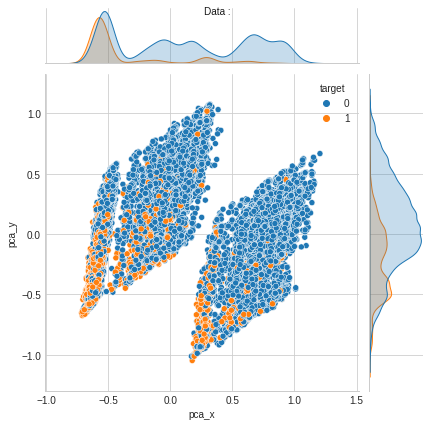

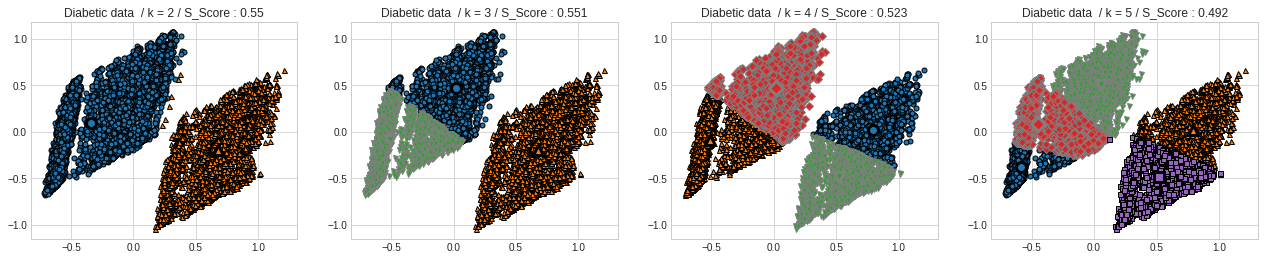

In [ ]:
Scatter_plot(clusterDF)

k_Means_Plot(Data = clusterDF,
            Select_k = range(2,6),
            Init_Method = 'k-means++', Num_init = 10)

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 5, random_state = 2022)
cluster_labels = kmeans.fit_predict(clusterDF[['pca_x', 'pca_y']])
clusterDF['kmeans_label'] = cluster_labels

centers

In [ ]:
'''from scipy.cluster.hierarchy import linkage, dendrogram

labels = pd.DataFrame(clusterDF['target'])
labels.columns = ['labels']

mergings = linkage(clusterDF[['pca_x', 'pca_y']], method = 'complete')

dendrogram(mergings, labels = labels.as_matrix(columns = ['labels']), leaf_rotation = 90, leaf_font_size = 20)

plt.show()'''

계층적 군집화

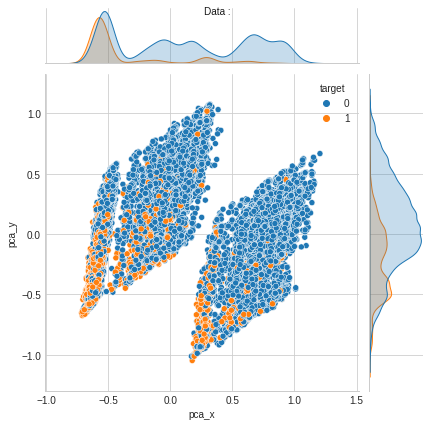

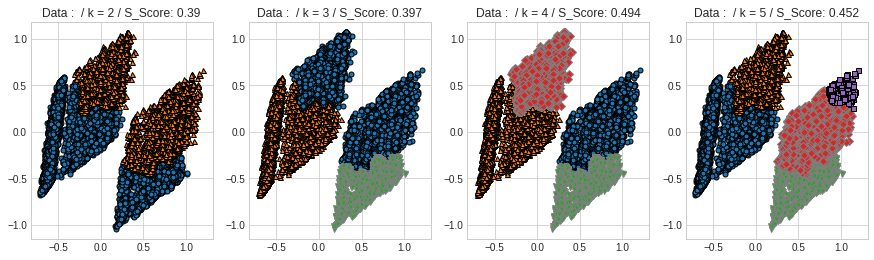

In [ ]:
def Hclust_Plot(Data, Select_k):
  Data2 = Data[['pca_x', 'pca_y']]
  fig, axes = plt.subplots(1, (np.max(list(Select_k))- np.min(list(Select_k))) + 1, figsize = (15, 4))
  for i in Select_k:
    H_Clustering = AgglomerativeClustering(n_clusters = i, linkage = "complete")
    P_Labels = H_Clustering.fit_predict(Data2)
    mglearn.discrete_scatter(Data2['pca_x'], Data2['pca_y'], P_Labels, ax = axes[i-2], s = 5)
    axes[i-2].set_title("Data:" + 'clustering ' + ' / k = ' + str(i))
    Score = np.round(silhouette_score(Data2, P_Labels), 3)
    axes[i-2].set_title('Data : ' + ' / k = ' + str(i) + ' / S_Score: ' + str(Score))


Scatter_plot(clusterDF)
Hclust_Plot(clusterDF,
            range(2, 6))

In [ ]:
H_clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')
P_Labels = H_clustering.fit_predict(clusterDF[['pca_x', 'pca_y']])
clusterDF['hierarchical_labels'] = P_Labels

print(clusterDF.groupby('target')['hierarchical_labels'].value_counts())

target  hierarchical_labels
0       0                      19289
        1                      14549
        2                       3317
1       1                       9697
        2                       1331
        0                        659
Name: hierarchical_labels, dtype: int64


In [ ]:
v_measure_score = np.round(metrics.v_measure_score(clusterDF['target'], P_Labels), 3)    
v_measure_score

0.134

In [ ]:
clusterDF.to_csv('/content/drive/MyDrive/clu.csv')
df.to_csv('/content/drive/MyDrive/df.csv')

계층적 군집화 - DenDrogram 그리기

In [ ]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
  Linkage_Matrix = linkage(Data, 'complete')
  if(Full_Use == True):
    Num_of_p = np.shape(Data)[0]
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')

  else:
    plt.title('Hierarchical Clustering Dendrogram (truncated)')
    plt.xlabel('sample index or (cluster size)')
  plt.ylabel('distance')
  dendrogram(
      Linkage_Matrix,
      truncate_mode = 'lastp',
      p = Num_of_p,
      leaf_rotation = 90,
      leaf_font_size = 12,
      color_threshold = 'default'
  )
  plt.show()

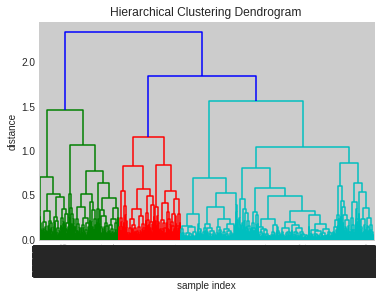

In [ ]:
Fixed_Dendrogram(clusterDF[['pca_x', 'pca_y']][:43000], -1, True) # -1 : nomeaningful value

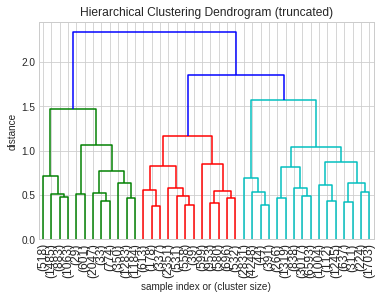

In [ ]:
Fixed_Dendrogram(clusterDF[['pca_x', 'pca_y']][:43000], 40, False)

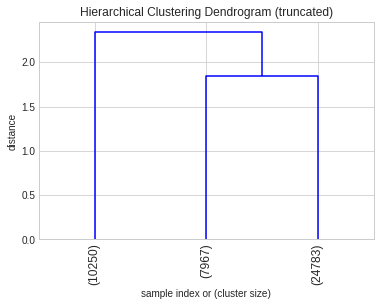

In [ ]:
Fixed_Dendrogram(clusterDF[['pca_x', 'pca_y']][:43000], 3, False)

DBSCAN -> 하이퍼 파라미터 선정하기

In [ ]:
import sklearn.metrics as metrics

epsilon = [0.06, 0.08, 0.1]
min_samples = [5, 8, 10, 15]

for eps in epsilon:
    for samples in min_samples:

      # DBSCAN 하이퍼 파라미터 설정

        fig, axes = plt.subplots(1, 2, figsize = (15, 4))
        sns.scatterplot(x = clusterDF['pca_x'],y =  clusterDF['pca_y'], hue = clusterDF['target'], ax = axes[0])


        print("Hyperparameters : [ e:", eps, ", n:", samples, "]")

        try:
          dbscan = DBSCAN(eps = eps, min_samples = samples).fit(clusterDF[['pca_x', 'pca_y']])
          dbscan_labels = dbscan.fit_predict(clusterDF[['pca_x', 'pca_y']])
          clusterDF['dbscan_cluster'] = dbscan_labels

          print("V-measure : %0.3f" % metrics.v_measure_score(clusterDF['target'], dbscan_labels))
        except:
          pass
        print("Silhouette score : %0.3f" % metrics.silhouette_score(clusterDF[['pca_x', 'pca_y']], dbscan_labels))

        visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import sklearn.metrics as metrics

epsilon = [0.06, 0.08, 0.1]
min_samples = [20, 30, 40, 50]

for eps in epsilon:
    for samples in min_samples:

      # DBSCAN 하이퍼 파라미터 설정

        fig, axes = plt.subplots(1, 2, figsize = (15, 4))
        sns.scatterplot(x = clusterDF['pca_x'],y =  clusterDF['pca_y'], hue = clusterDF['target'], ax = axes[0])


        print("Hyperparameters : [ e:", eps, ", n:", samples, "]")

        try:
          dbscan = DBSCAN(eps = eps, min_samples = samples).fit(clusterDF[['pca_x', 'pca_y']])
          dbscan_labels = dbscan.fit_predict(clusterDF[['pca_x', 'pca_y']])
          clusterDF['dbscan_cluster'] = dbscan_labels

          print("V-measure : %0.3f" % metrics.v_measure_score(clusterDF['target'], dbscan_labels))
        except:
          pass
        print("Silhouette score : %0.3f" % metrics.silhouette_score(clusterDF[['pca_x', 'pca_y']], dbscan_labels))

        visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)


Output hidden; open in https://colab.research.google.com to view.

Hyperparameters : [ e: 0.05 , n: 40 ]
V-measure : 0.120
Silhouette score : 0.431


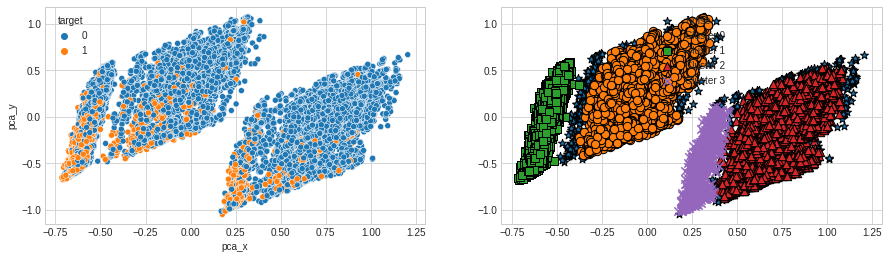

Hyperparameters : [ e: 0.05 , n: 50 ]
V-measure : 0.117
Silhouette score : 0.350


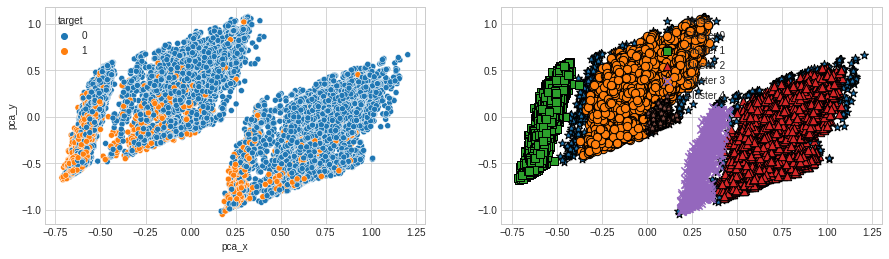

Hyperparameters : [ e: 0.06 , n: 40 ]
V-measure : 0.121
Silhouette score : 0.431


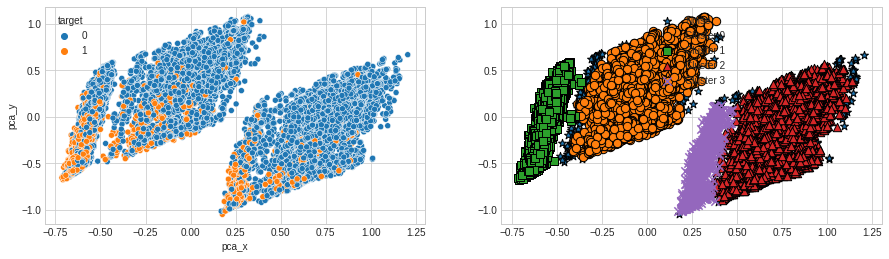

Hyperparameters : [ e: 0.06 , n: 50 ]
V-measure : 0.120
Silhouette score : 0.433


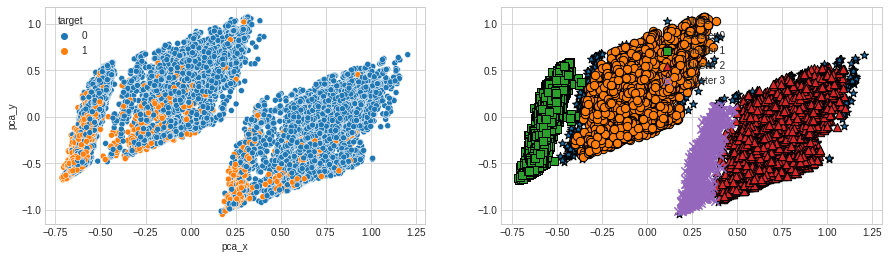

Hyperparameters : [ e: 0.07 , n: 40 ]
V-measure : 0.101
Silhouette score : 0.495


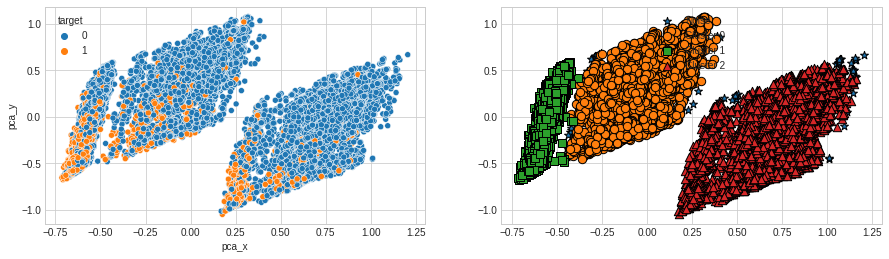

Hyperparameters : [ e: 0.07 , n: 50 ]
V-measure : 0.100
Silhouette score : 0.497


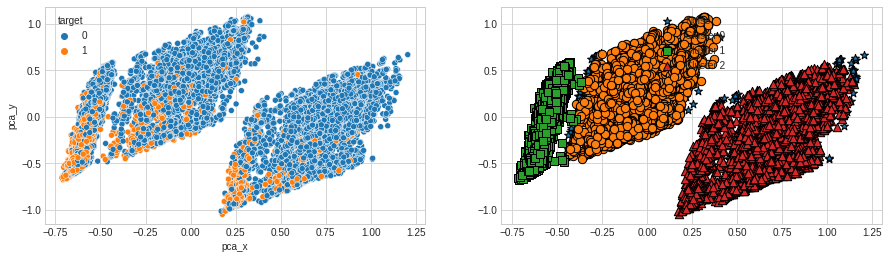

In [ ]:
import sklearn.metrics as metrics

epsilon = [0.05, 0.06, 0.07]
min_samples = [40, 50]

for eps in epsilon:
    for samples in min_samples:

      # DBSCAN 하이퍼 파라미터 설정

        fig, axes = plt.subplots(1, 2, figsize = (15, 4))
        sns.scatterplot(x = clusterDF['pca_x'],y =  clusterDF['pca_y'], hue = clusterDF['target'], ax = axes[0])


        print("Hyperparameters : [ e:", eps, ", n:", samples, "]")

        try:
          dbscan = DBSCAN(eps = eps, min_samples = samples).fit(clusterDF[['pca_x', 'pca_y']])
          dbscan_labels = dbscan.fit_predict(clusterDF[['pca_x', 'pca_y']])
          clusterDF['dbscan_cluster'] = dbscan_labels

          print("V-measure : %0.3f" % metrics.v_measure_score(clusterDF['target'], dbscan_labels))
        except:
          pass
        print("Silhouette score : %0.3f" % metrics.silhouette_score(clusterDF[['pca_x', 'pca_y']], dbscan_labels))

        visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)


target  dbscan_cluster
0        2                13030
         0                11700
         1                10878
         3                 1297
        -1                  250
1        1                 8848
         3                 1102
         0                 1040
         2                  666
        -1                   31
Name: dbscan_cluster, dtype: int64


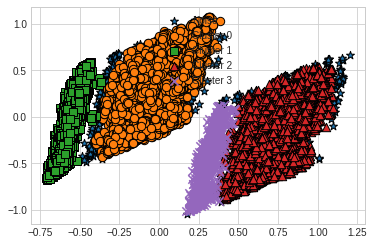

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.06, min_samples = 50, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(clusterDF[['pca_x', 'pca_y']])

clusterDF['dbscan_cluster'] = dbscan_labels

cluster_result = clusterDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(cluster_result)

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)

DBSCAN - 실제 결과와 군집화 결과 비교

target  dbscan_cluster
0        2                14379
         0                11803
         1                10880
        -1                   93
1        1                 8852
         2                 1769
         0                 1056
        -1                   10
Name: dbscan_cluster, dtype: int64


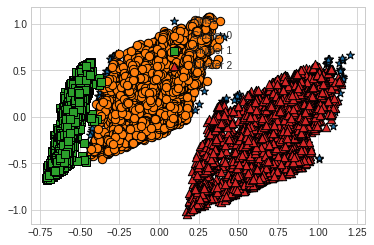

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.07, min_samples = 50, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(clusterDF[['pca_x', 'pca_y']])

clusterDF['dbscan_cluster'] = dbscan_labels

cluster_result = clusterDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(cluster_result)

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter = False)